In [1]:
import numpy as np
import pandas as pd
from math import log2, sqrt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import shuffle
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

Stage 2. With the orginal circuit

In [11]:
file_path = 'GeneratedRandomBits_1.txt'

with open(file_path, 'r') as file:
    data = file.readlines()

# Split data into sequences and labels
sequences = []
labels = []

for line in data:
    sequence, label = line.strip().split()
    sequences.append(sequence)
    labels.append(int(label))

df = pd.DataFrame({'sequence': sequences, 'label': labels})
# shuffle
df = shuffle(df).reset_index(drop=True)
X = np.array([list(map(int, seq)) for seq in df['sequence']])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 73.50%


Gradient Boosting Accuracy: 73.50%


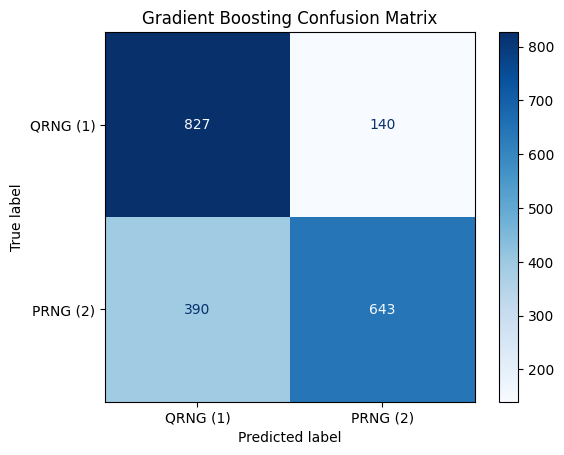

Random Forest Accuracy: 72.40%


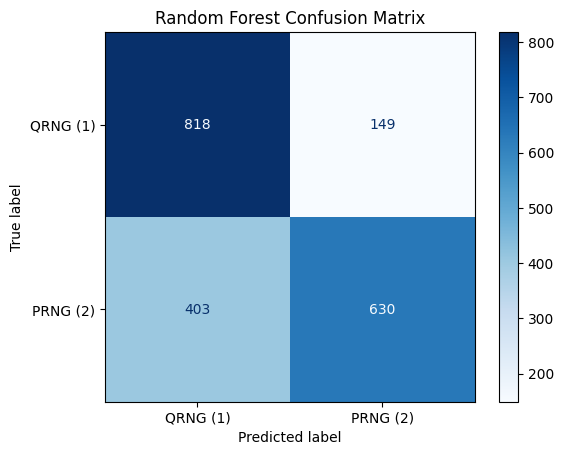

Neural Network Accuracy: 66.05%


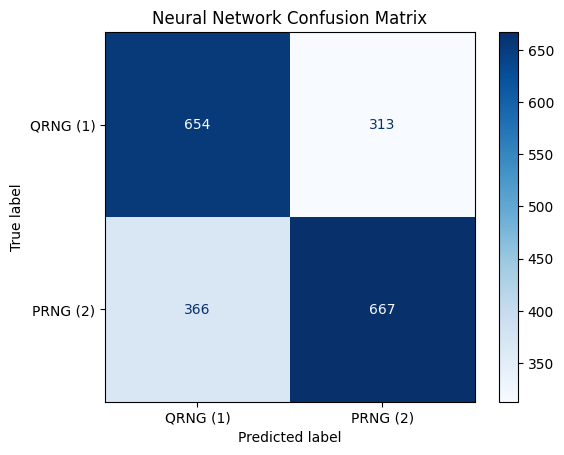

Gradient Boosting model meets the target accuracy.
Random Forest model meets the target accuracy.
Neural Network model meets the target accuracy.


In [13]:
models = {
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Neural Network": MLPClassifier(random_state=42, max_iter=500)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy * 100:.2f}%')

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["QRNG (1)", "PRNG (2)"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{name} Confusion Matrix')
    plt.show()

# Check if any model meets the target accuracy
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    if accuracy >= 0.60:
        print(f"{name} model meets the target accuracy.")
    else:
        print(f"{name} model does not meet the target accuracy.")

Stage 5: After adding more data of pre_processing and post_processing

In [21]:
file_path = 'GeneratedRandomBits_2.txt'

with open(file_path, 'r') as file:
    data = file.readlines()

# Split data into sequences and labels
sequences = []
labels = []

for line in data:
    sequence, label = line.strip().split()
    sequences.append(sequence)
    labels.append(int(label))

df = pd.DataFrame({'sequence': sequences, 'label': labels})
# shuffle
df = shuffle(df).reset_index(drop=True)
X = np.array([list(map(int, seq)) for seq in df['sequence']])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 67.97%


Gradient Boosting Accuracy: 67.97%


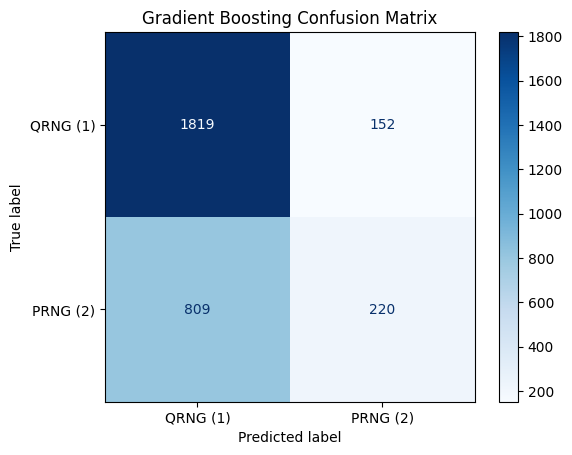

Neural Network Accuracy: 60.33%


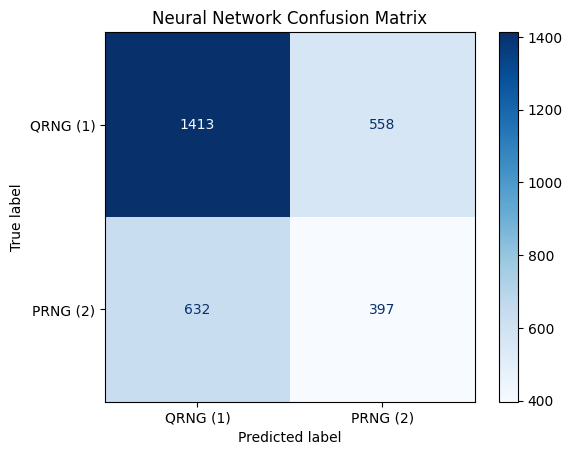

Gradient Boosting model meets the target accuracy.
Neural Network model meets the target accuracy.


In [24]:
models = {
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Neural Network": MLPClassifier(random_state=42, max_iter=500)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy * 100:.2f}%')

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["QRNG (1)", "PRNG (2)"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{name} Confusion Matrix')
    plt.show()

# Check if any model meets the target accuracy
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    if accuracy >= 0.60:
        print(f"{name} model meets the target accuracy.")
    else:
        print(f"{name} model does not meet the target accuracy.")